In [2]:
import numpy as np
import matplotlib.pyplot as plt 
np.random.seed(0) ### fijamos la misma semilla par a los numeros aleatorios asi todos tendremos los mismos resultados

### Simularemos datos para poder generar la siguiente funcion
$y_i = 0.5 + x_i - 0.1x_i^2 + \epsilon_i$

In [3]:
T = 2000 ## Largo de la muestra de nuestros datos simulados
x = np.random.normal(5,2,T) ## genero numeros aleatorios normales con media 5 y desv est 2
ϵ = np.random.normal(0,1,T) ##genero el error aleatorio normal con media cero y desv est 1
y = 0.5 + x - 0.1*x**2 + ϵ

### Vemos graficamente la funcion simulada

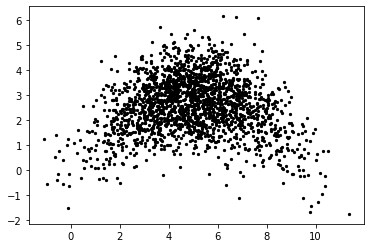

In [4]:
plt.scatter(x,y,color='black',s=5)
plt.show()

### Asumimos que no conocemos el modelo. Estimamos en primer caso una regresion lineal con un polinomio de orden 1
$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$

#### Para poder estimar este modelo necesito crear la matriz X_1

In [5]:
X_1 = np.column_stack([np.ones_like(x),x])
X_1

array([[1.        , 8.52810469],
       [1.        , 5.80031442],
       [1.        , 6.95747597],
       ...,
       [1.        , 5.31686769],
       [1.        , 2.71619716],
       [1.        , 2.37805926]])

In [6]:
β_1 = np.linalg.inv(X_1.T@X_1)@(X_1.T@y)
print(β_1)

[ 2.61477297 -0.00656533]


## Graficamos el modelo

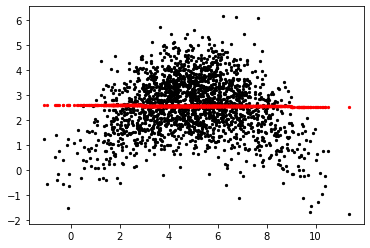

In [7]:
plt.scatter(x,y,color='black',s=5)
plt.scatter(x,X_1@β_1,color='red',s=5)
plt.show()

### Estimaremos un modelo de orden 2
$y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \epsilon_i$

In [8]:
X_2 = np.column_stack([np.ones_like(x),x,x**2])

In [15]:
β_2 = np.linalg.inv(X_2.T@X_2)@(X_2.T@y)
print(β_2)

y

[ 0.38123337  1.04551764 -0.10499688]


array([0.22232667, 1.22397952, 2.66296384, ..., 2.95938704, 4.05551267,
       1.49974057])

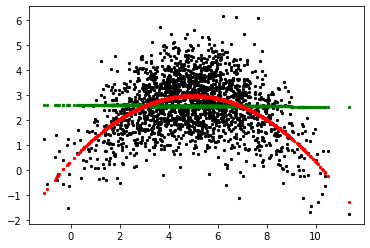

In [9]:
plt.scatter(x,y,color='black',s=5)
plt.scatter(x,X_1@β_1,color='green',s=5)
plt.scatter(x,X_2@β_2,color='red',s=5)
plt.show()

### Generalizaremos el modelo a un polinomio de orden K
$y_i = \beta_0 + \beta_1 x_i + .... + \beta_k x_i^k + \epsilon_i$

In [10]:
K = 3
X_K = np.column_stack([x**k for k in range(K+1)])


### Estimamos el modelo de forma polinomial 

In [11]:
β_K = np.linalg.inv(X_K.T@X_K)@(X_K.T@y)
print(β_K)

[ 0.54941792  0.88945843 -0.06812477 -0.00246723]


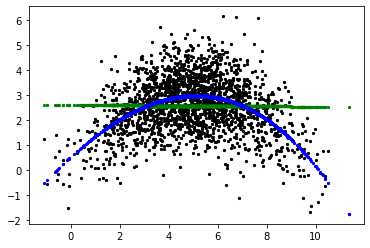

In [12]:
plt.scatter(x,y,color='black',s=5)
plt.scatter(x,X_1@β_1,color='green',s=5)
plt.scatter(x,X_K@β_K,color='blue',s=5)
plt.show()

### Comparamos los modelos a traves del ECM (MSE)
$ECM = \frac{1}{N}\sum_{i=1}^N(y_i-\hat{y}_i)^2$

In [13]:
ECM_1 = np.mean((y-X_1@β_1)**2)
ECM_2 = np.mean((y-X_2@β_2)**2)
ECM_K = np.mean((y-X_K@β_K)**2)

In [14]:
print(ECM_1,ECM_2,ECM_K)

1.2812732706994743 0.9705852523042575 0.9689735276402645


### Lo que observamos en este ECM es un claro ejemplo de overfitting. En este caso sabemos que el modelo verdadero (DGP) es un polinomio de orden 2. Sin embargo, al comparar los modelos a traves del ECM el mejor modelos parece ser el polinomio de orden 10

### La gran equivocacion que cometimos en este ejercicio que erroneamente nos lleva a determinar que el polinomio de orden 10 es el mejor, es que estimamos y testeamos en los mismo datos. Nunca dividimos la muestra entre entrenamiento y testeo. Dicho de otra manera, nunca hicimos validacion cruzada. 